In [48]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [49]:
#load data_1
data = pd.read_csv('data_1.csv')

In [50]:
data

,customer_unique_id,frequency,recency,amount_spent
0,0000366f3b9a7992bf8c76cfdf3221e2,1,160,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,163,18.90
2,0000f46a3911fa3c0805444483337064,1,585,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,369,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,336,180.00
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2,495,1570.00
96092,fffea47cd6d3cc0a88bd621562a9d061,1,310,64.89
96093,ffff371b4d645b6ecea244b27531430a,1,617,89.90
96094,ffff5962728ec6157033ef9805bacc48,1,168,115.00


In [51]:
data.set_index('customer_unique_id', inplace=True)

In [52]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [53]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

In [8]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(data_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

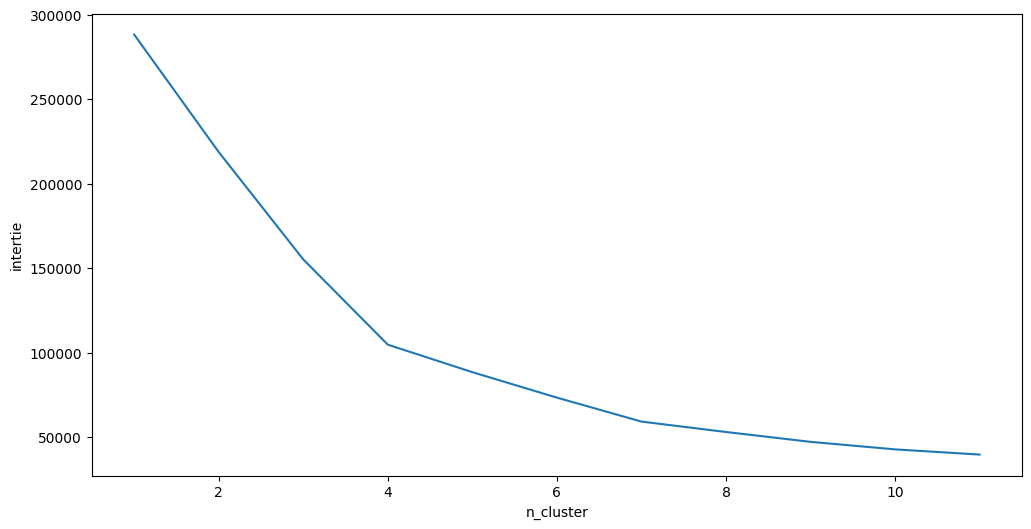

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [55]:
data_cluster = pd.DataFrame(data={'cluster': kmeans.labels_}, index=data.index)
data = data.merge(data_cluster, left_index=True, right_index=True)

In [56]:
data

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,160,129.90,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,163,18.90,0
0000f46a3911fa3c0805444483337064,1,585,69.00,1
0000f6ccb0745a6a4b88665a16c9f078,1,369,25.99,1
0004aac84e0df4da2b147fca70cf8255,1,336,180.00,1
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,495,1570.00,3
fffea47cd6d3cc0a88bd621562a9d061,1,310,64.89,1
ffff371b4d645b6ecea244b27531430a,1,617,89.90,1


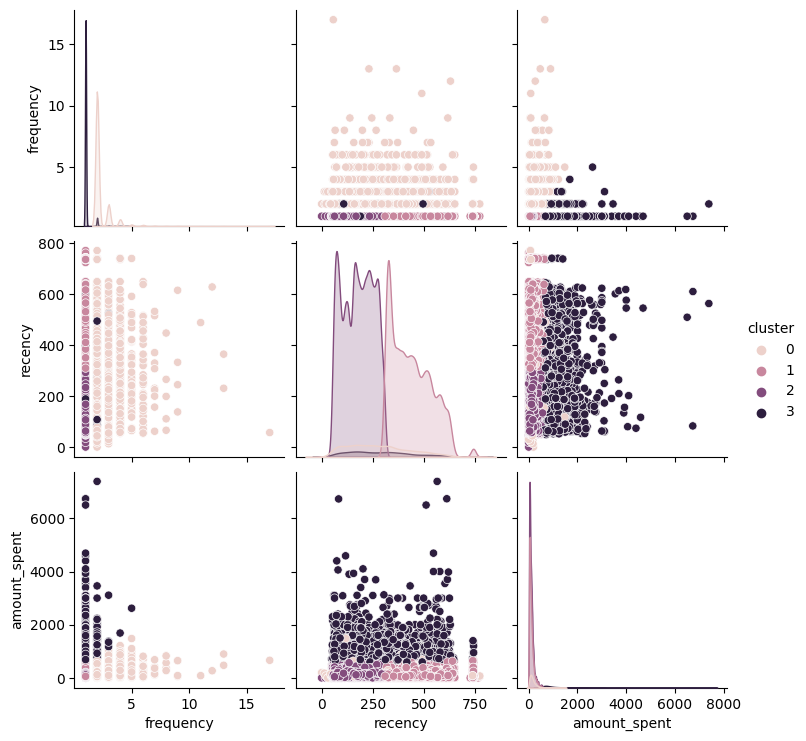

In [13]:
sns.pairplot(data, hue="cluster")

In [57]:
data_cluster_0 = data.loc[data['cluster']==0]
data_cluster_1 = data.loc[data['cluster']==1]
data_cluster_2 = data.loc[data['cluster']==2]
data_cluster_3 = data.loc[data['cluster']==3]

In [58]:
data.describe()

,frequency,recency,amount_spent,cluster
count,96096.000000,96096.000000,96096.000000,96096.000000
mean,1.080222,287.735691,131.306399,0.587985
std,0.368749,153.414676,197.726614,0.724068
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,163.000000,43.200000,0.000000
50%,1.000000,268.000000,79.990000,0.000000
75%,1.000000,397.000000,147.900000,1.000000
max,17.000000,772.000000,7388.000000,3.000000


In [59]:
data_cluster_0.describe()

,frequency,recency,amount_spent,cluster
count,50575.0,50575.000000,50575.000000,50575.0
mean,1.0,177.937380,103.125239,0.0
std,0.0,73.109145,90.224547,0.0
min,1.0,0.000000,0.000000,0.0
25%,1.0,114.000000,39.990000,0.0
50%,1.0,180.000000,78.000000,0.0
75%,1.0,240.000000,134.900000,0.0
max,1.0,308.000000,590.000000,0.0


In [60]:
data_cluster_1.describe()

,frequency,recency,amount_spent,cluster
count,37107.0,37107.000000,37107.000000,37107.0
mean,1.0,438.752365,102.424133,1.0
std,0.0,96.401040,92.118968,0.0
min,1.0,309.000000,0.000000,1.0
25%,1.0,351.000000,39.900000,1.0
50%,1.0,426.000000,74.490000,1.0
75%,1.0,512.000000,129.990000,1.0
max,1.0,772.000000,649.170000,1.0


In [61]:
data_cluster_2.describe()

,frequency,recency,amount_spent,cluster
count,5846.000000,5846.000000,5846.000000,5846.0
mean,2.299179,278.227164,169.395811,2.0
std,0.793228,149.565190,140.876827,0.0
min,2.000000,0.000000,0.000000,2.0
25%,2.000000,158.000000,73.370000,2.0
50%,2.000000,260.500000,129.000000,2.0
75%,2.000000,381.000000,219.967500,2.0
max,17.000000,772.000000,1479.400000,2.0


In [62]:
data_cluster_3.describe()

,frequency,recency,amount_spent,cluster
count,2568.000000,2568.000000,2568.000000,2568.0
mean,1.044393,289.628505,1016.947255,3.0
std,0.229275,151.967552,565.361616,0.0
min,1.000000,49.000000,548.000000,3.0
25%,1.000000,163.000000,669.000000,3.0
50%,1.000000,276.000000,829.000000,3.0
75%,1.000000,395.250000,1189.925000,3.0
max,5.000000,742.000000,7388.000000,3.0


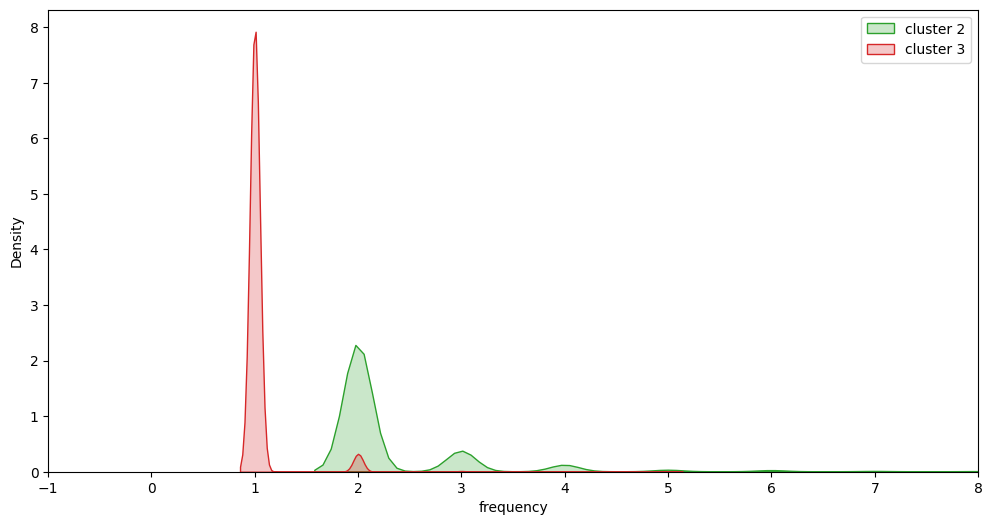

In [63]:
# Plot the distribution of frequency for each cluster
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.kdeplot(data_cluster_0['frequency'], shade=True, label='cluster 0')
sns.kdeplot(data_cluster_1['frequency'], shade=True, label='cluster 1')
sns.kdeplot(data_cluster_2['frequency'], shade=True, label='cluster 2')
sns.kdeplot(data_cluster_3['frequency'], shade=True, label='cluster 3')
plt.legend()
plt.xlim(-1, 8)
plt.show()

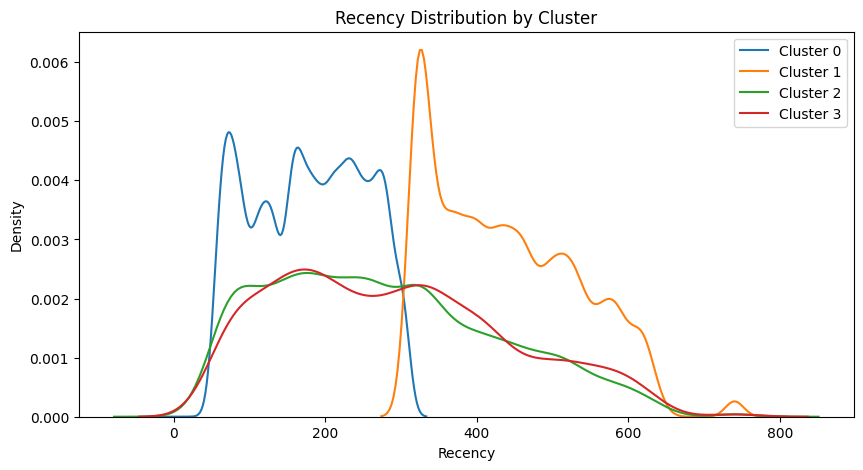

In [64]:
# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['recency'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['recency'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3['recency'], label='Cluster 3', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.legend()
plt.show()

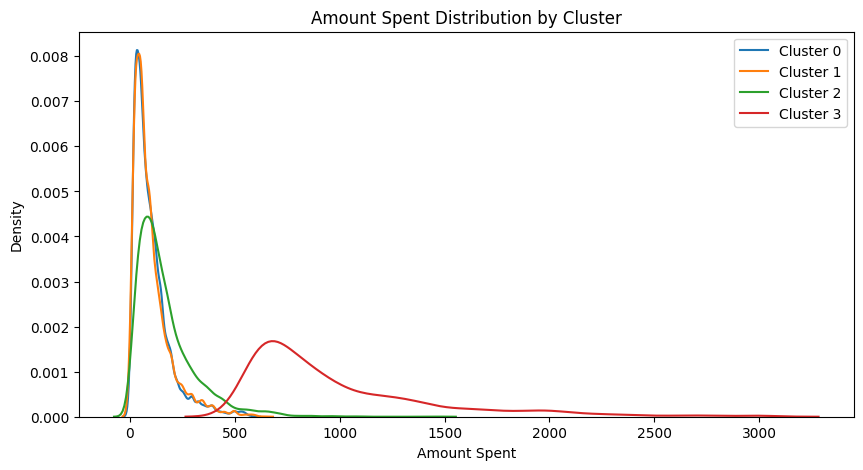

In [65]:
# Plot the distribution of amount spent under 3000 for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0.loc[data_cluster_0['amount_spent']<3000]['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1.loc[data_cluster_1['amount_spent']<3000]['amount_spent'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2.loc[data_cluster_2['amount_spent']<3000]['amount_spent'], label='Cluster 2', legend=True)
sns.kdeplot(data_cluster_3.loc[data_cluster_3['amount_spent']<3000]['amount_spent'], label='Cluster 3', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.legend()
plt.show()

In [71]:
data_scaled = data_scaled.merge(data_cluster, left_index=True, right_index=True)

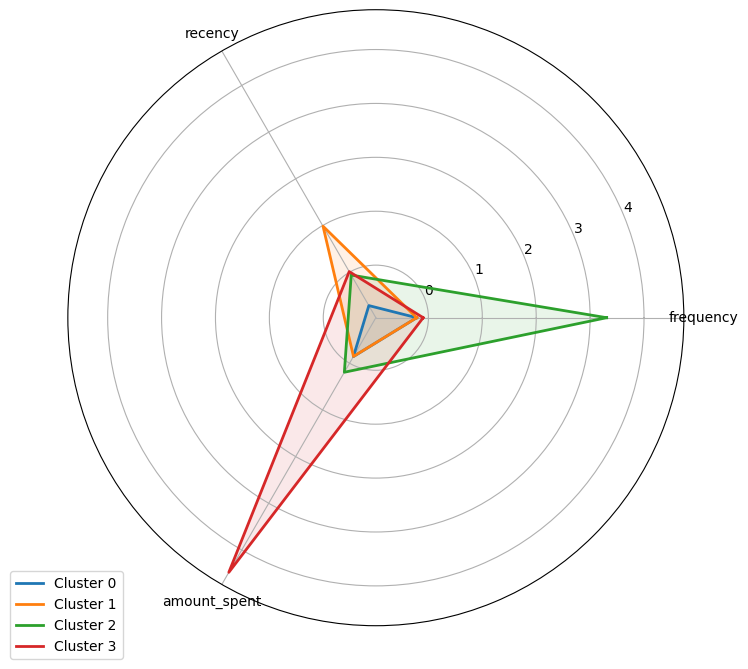

In [73]:
cluster_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]
variables = ["frequency", "recency", "amount_spent"]
data_values = []
data_scaled.merge(data_cluster, left_index=True, right_index=True)

# Récupération des données pour chaque variable et chaque cluster
for cluster in range(4):
    values = []
    for variable in variables:
        values.append(data_scaled[data_scaled["cluster"] == cluster][variable].mean())
    data_values.append(values)

# Ajout de la première variable à la fin de la liste pour fermer le polygone
for i in range(4):
    data_values[i].append(data_values[i][0])

# Calcul de l'angle pour chaque variable
angles = [n / float(len(variables)) * 2 * pi for n in range(len(variables))]
angles.append(angles[0])

# Initialisation du plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Création du polygone pour chaque cluster
for i in range(4):
    values = data_values[i]
    ax.plot(angles, values, linewidth=2, label=cluster_names[i])
    ax.fill(angles, values, alpha=0.1)

# Ajout des labels pour chaque variable
plt.xticks(angles[:-1], variables)

# Ajout de la légende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Affichage du radar chart
plt.show()

In [ ]:
data_frequency = data.drop(data.loc[data['frequency']<2].index, axis=0)

In [ ]:
data_frequency.drop(['cluster'], axis=1, inplace=True)

In [ ]:
#kmean to data_frequency
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_frequency)

KMeans(n_clusters=3)

In [ ]:
data_frequency_cluster = pd.DataFrame(data={'cluster': kmeans.labels_}, index=data_frequency.index)
data_frequency = data_frequency.merge(data_frequency_cluster, left_index=True, right_index=True)

In [ ]:
data_f_cluster0 = data_frequency.loc[data_frequency['cluster']==0]
data_f_cluster1 = data_frequency.loc[data_frequency['cluster']==1]
data_f_cluster2 = data_frequency.loc[data_frequency['cluster']==2]

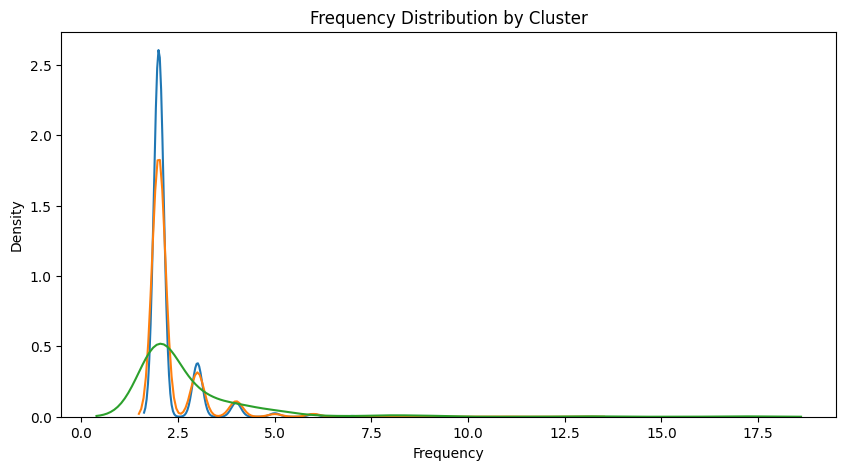

In [ ]:
# Plot the distribution of frequency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_f_cluster0['frequency'], label='Cluster 0', legend=True)
sns.kdeplot(data_f_cluster1['frequency'], label='Cluster 1', legend=True)
sns.kdeplot(data_f_cluster2['frequency'], label='Cluster 2', legend=True)
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.show()

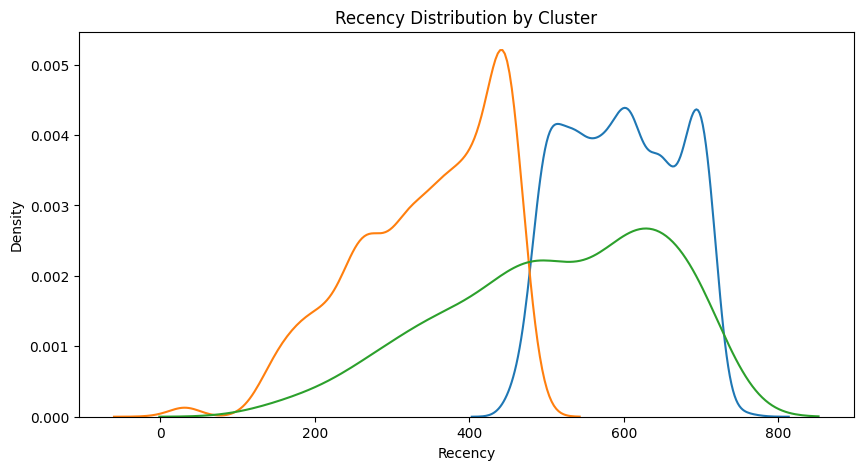

In [ ]:
#plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_f_cluster0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(data_f_cluster1['recency'], label='Cluster 1', legend=True)
sns.kdeplot(data_f_cluster2['recency'], label='Cluster 2', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

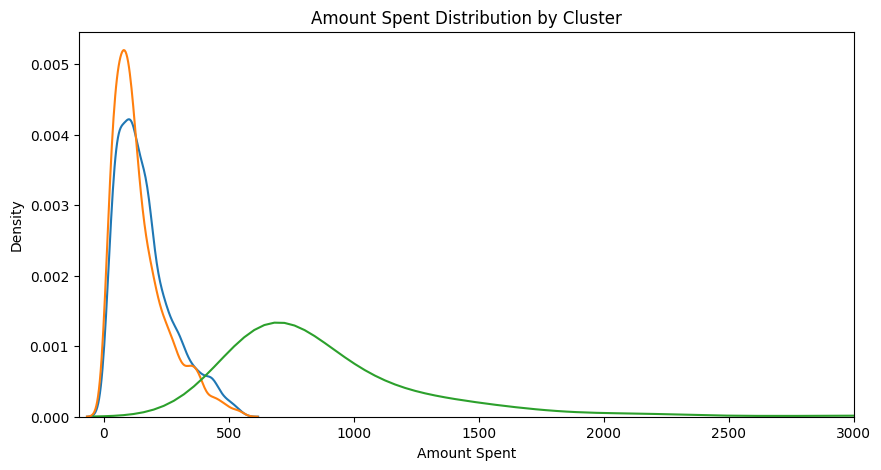

In [ ]:
#plot the distribution of amount spent for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_f_cluster0['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(data_f_cluster1['amount_spent'], label='Cluster 1', legend=True)
sns.kdeplot(data_f_cluster2['amount_spent'], label='Cluster 2', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.xlim(-100,3000)
plt.show()